# Geothermal gradient map
#### - Cinar

In [1]:
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./data/SMU_Borehole_Temp_Obs_in_Content_Model_Format_0.csv')

In [3]:
# checking undefined wells' coordinates to see if they land in the area of our interest.
unknown = data[data['State']!='Texas'] 

lat_mask = (unknown['LatDegree'] > 29.6) & (unknown['LatDegree'] < 31.1)
long_mask = (unknown['LongDegree'] > -98.5) & (unknown['LongDegree'] < -96.5)

unknown = unknown[lat_mask & long_mask]

print('No unknown wells are in the area of interest.')

No unknown wells are in the area of interest.


In [4]:
tx = data[data['State']=='Texas']

# County Masks
bastr = tx[tx['County']=='Bastrop County']
will = tx[tx['County']=='Williamson County']
trav = tx[tx['County']=='Travis County']
lee = tx[tx['County']=='Lee County']
bell = tx[tx['County']=='Bell County']
cald = tx[tx['County']=='Caldwell County']
hays = tx[tx['County']=='Hays County']
burn = tx[tx['County']=='Burnet County']
blan = tx[tx['County']=='Blanco County']

counties = [bastr, will, trav, lee, bell, cald, hays, burn, blan]

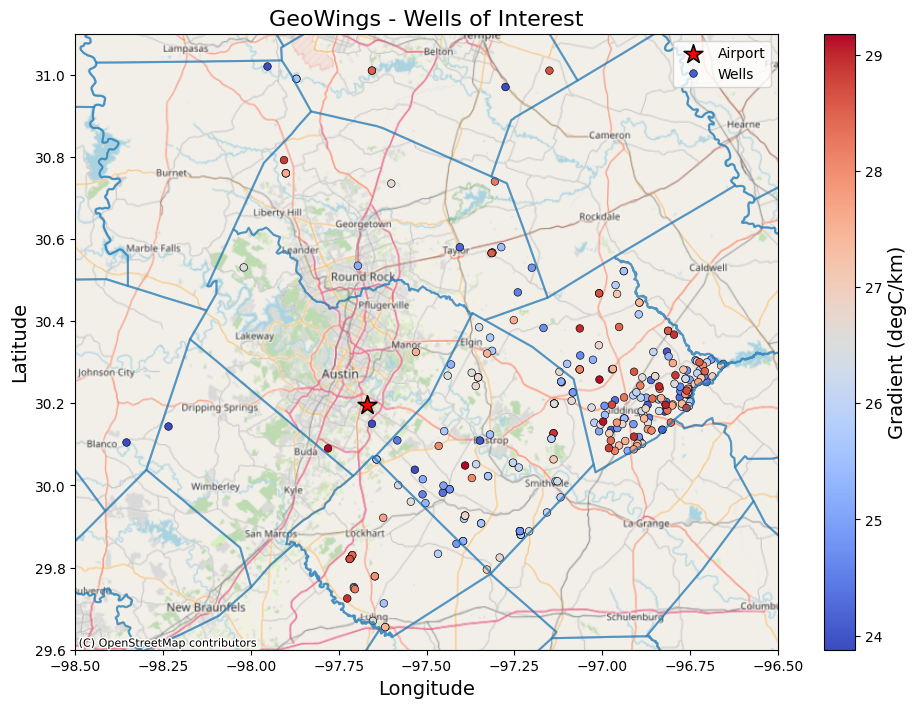

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))
mi_mapa=gpd.read_file('./map/County.shp')
mi_mapa=mi_mapa.to_crs('EPSG:4326')

# https://gis-txdot.opendata.arcgis.com/maps/texas-county-boundaries-detailed
mi_mapa.boundary.plot(ax=ax,alpha =0.5)

source = cx.providers.OpenStreetMap.Mapnik
# source = cx.providers.USGS.USTopo

ax.set_xlim(-98.5,-96.5); ax.set_ylim(29.6,31.1)
cx.add_basemap(ax, crs=mi_mapa.crs.to_string(),source=source,zoom='auto')

for county in counties:
    im = sns.scatterplot(x=county['LongDegree'],y=county['LatDegree'], s=30, hue = county['Gradient'],
                         color='grey', edgecolor='k', ax=ax, palette='coolwarm')

sns.scatterplot(x=[-97.6704187929783], y=[30.19671731635814], color='red', edgecolor='k', s=200, marker='*', label= 'Airport')

# # sns.scatterplot(eq_pd['longitude'],eq_pd['latitude'],ax=ax,s=120,
# #                 color='red', marker='*',edgecolor='k',label='Earthquakes',legend='brief',
# #                size=eq_pd['mag'],sizes=(50,300),palette='deep')


handles,labels = ax.get_legend_handles_labels()
plt.legend(handles=[handles[-1],handles[0]], labels=['Airport', 'Wells'])

plt.xlabel('Longitude', fontsize=14); plt.ylabel('Latitude', fontsize=14)
plt.title('GeoWings - Wells of Interest', fontsize=16)


norm = plt.Normalize(vmin=county['Gradient'].min(), vmax=county['Gradient'].max()) 
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])  # Remove the data array requirement for the colorbar
cbar = fig.colorbar(sm, ax=ax).set_label(label='Gradient (degC/km)',size=14)

plt.savefig('Wells_of_interest.jpeg',dpi=300)
plt.show()

In [7]:
bastr[['DrillerTotalDepth', 'DepthReferencePoint', 'LengthUnits', 'WellBoreShape', 'TrueVerticalDepth', 'MeasuredTemperature',
'CorrectedTemperature', 'TemperatureUnits', 'Gradient','DepthOfMeasurement', 'MeasurementDateTime', 'MeasurementSource',
'CasingBottomDepthDriller', 'CasingTopDepth']]

,DrillerTotalDepth,DepthReferencePoint,LengthUnits,WellBoreShape,TrueVerticalDepth,MeasuredTemperature,CorrectedTemperature,TemperatureUnits,Gradient,DepthOfMeasurement,MeasurementDateTime,MeasurementSource,CasingBottomDepthDriller,CasingTopDepth
91748,1748.2,NaN,m,NaN,NaN,47.2,48.4,C,24.986803,1136.6,NaN,nil:missing,NaN,NaN
91749,1748.2,NaN,m,NaN,NaN,59.4,67.7,C,27.285208,1748.2,NaN,nil:missing,NaN,NaN
95530,768.9,NaN,m,NaN,NaN,47.2,43.3,C,30.30303,768.9,NaN,nil:missing,NaN,NaN
96462,686.0,NaN,m,NaN,NaN,46.7,41.6,C,31.48688,686.0,NaN,nil:missing,NaN,NaN
96617,2778.0,NaN,m,NaN,NaN,82.8,98.9,C,28.401728,2778.0,NaN,nil:missing,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146412,795.4,NaN,m,NaN,NaN,41.1,37.6,C,22.127232,795.4,NaN,nil:missing,NaN,NaN
146432,3007.3,NaN,m,NaN,NaN,74.4,91.6,C,23.808732,3007.3,NaN,nil:missing,NaN,NaN
147203,1216.8,NaN,m,NaN,NaN,41.7,40.4,C,21.473684,950.0,NaN,nil:missing,NaN,NaN
147204,1216.8,NaN,m,NaN,NaN,42.2,42.7,C,21.063376,1077.7,NaN,nil:missing,NaN,NaN
